## 1. Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK. https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. *



In [2]:
# Import necessary modules
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import re


In [3]:
from collections import Counter
from time import perf_counter

In [4]:
paradise_words = nltk.corpus.gutenberg.words('milton-paradise.txt')
len(paradise_words)
paradise_words

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [5]:
type(paradise_words)

nltk.corpus.reader.util.StreamBackedCorpusView

In [6]:
#Check the frequency distribution of words in milton-paradise.txt, including punctuation
vocab = nltk.FreqDist(nltk.Text(nltk.corpus.gutenberg.words('milton-paradise.txt')))
print(len(vocab))
print(vocab.most_common(20))
vocab

10751
[(',', 10198), ('and', 2799), ('the', 2505), (';', 2317), ('to', 1758), ('of', 1486), ('.', 1254), ('in', 1083), ('his', 986), ('with', 876), (':', 748), ('all', 604), ('And', 596), ("'", 595), ('I', 589), ('or', 578), ('Of', 564), ('from', 543), ('that', 536), ('not', 527)]


FreqDist({',': 10198, 'and': 2799, 'the': 2505, ';': 2317, 'to': 1758, 'of': 1486, '.': 1254, 'in': 1083, 'his': 986, 'with': 876, ...})

## get the list of stop words

In [7]:
# stop words are common words that have low information value in text
#we generally get rid of stop words
#nltk.download('stopwords')
sw = set(nltk.corpus.stopwords.words('english'))
print("Stop words: " + str(list(sw)[:10]))

Stop words: ['again', 'do', 'now', "wouldn't", 'itself', "should've", 'who', 'what', 'or', 'off']


## to remove meaningless words, get word list to compare

In [8]:
#nltk.download('words')
words_dict = set(nltk.corpus.words.words())
len(words_dict)

235892

## Stemming 
Preprocessing - Exclude punctutation, stop words, take only alphabets and convert to lowercase and meaningless words

In [9]:
#stemming - finding root words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = "english")


In [10]:
import string
import datetime


without_punct = [w for w in paradise_words if w not in string.punctuation]
#without_punct = [re.sub(r'[^\w\s]','',w) for w in paradise_words ] 

lower_alpha_tokens = [t.lower() for t in paradise_words if t.isalpha()]

# Retain alphabetic words: alpha_only
#alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in lower_alpha_tokens if t not in sw]

#('thi', 414)
#Removing meaningless words
meaningless_removed = [m for m in no_stops if m in words_dict]

t1 = perf_counter()
# Stem all tokens into a new list: lemmatized
stemmed = [stemmer.stem(t) for t in meaningless_removed]

t2 = perf_counter()
print("Time taken for stemming:", t2-t1)

Time taken for stemming: 0.8372580999999855


In [11]:
print(len(paradise_words))
print(len(without_punct))
print(len(lower_alpha_tokens))
print(len(no_stops))
print(len(meaningless_removed))
print(len(stemmed))



96825
80701
80493
45568
37283
37283


In [12]:
#check for all the words before stemming
print(meaningless_removed)

['paradise', 'lost', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'till', 'one', 'greater', 'man', 'restore', 'us', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'rose', 'chaos', 'sion', 'hill', 'delight', 'thee', 'brook', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'soar', 'th', 'mount', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'prefer', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighty', 'outspread', 'dove', 'like', 'sat', 'st', 'brooding', 'vast', 'abyss', 'mad', 'st', 'pregnant', 'dark', 'illumine', 'low', 'raise', 'support', 'height', 'great', 'argument', 'may', 'assert', 'eternal', 'providence', 'justify', 'way

#### Using Couter to count frequency of words


In [13]:
# Create the bag-of-words: bow
bow = Counter(stemmed)

#print all the stemmed words
print(bow)


Counter({'heaven': 485, 'thou': 432, 'thi': 414, 'thee': 358, 'thus': 318, 'shall': 283, 'god': 260, 'earth': 228, 'yet': 228, 'though': 217, 'us': 187, 'man': 178, 'first': 175, 'high': 159, 'day': 157, 'one': 142, 'son': 132, 'great': 130, 'like': 129, 'far': 129, 'death': 126, 'may': 126, 'good': 122, 'till': 120, 'hell': 119, 'night': 117, 'love': 114, 'hath': 113, 'stood': 110, 'whose': 109, 'world': 108, 'might': 107, 'light': 106, 'way': 103, 'arm': 101, 'work': 99, 'know': 98, 'eve': 98, 'end': 93, 'air': 93, 'long': 92, 'soon': 91, 'fair': 91, 'dark': 90, 'still': 90, 'ye': 90, 'live': 90, 'life': 89, 'power': 88, 'let': 87, 'place': 85, 'forth': 85, 'less': 81, 'new': 80, 'hand': 78, 'much': 77, 'found': 77, 'part': 77, 'deep': 76, 'happi': 76, 'must': 75, 'find': 74, 'made': 74, 'come': 73, 'round': 72, 'th': 71, 'satan': 71, 'well': 71, 'men': 70, 'without': 70, 'return': 69, 'sight': 69, 'last': 68, 'sun': 68, 'fruit': 67, 'bright': 67, 'could': 67, 'none': 67, 'sinc': 66,

In [14]:
# Print the 10 most common tokens
print(bow.most_common(20))

[('heaven', 485), ('thou', 432), ('thi', 414), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 260), ('earth', 228), ('yet', 228), ('though', 217), ('us', 187), ('man', 178), ('first', 175), ('high', 159), ('day', 157), ('one', 142), ('son', 132), ('great', 130), ('like', 129), ('far', 129)]


#### Using FreqDist to get count of words

In [15]:
stem_word_count = nltk.FreqDist(nltk.Text(stemmed))
print(len(stem_word_count))
print(stem_word_count.most_common(20))

4659
[('heaven', 485), ('thou', 432), ('thi', 414), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 260), ('earth', 228), ('yet', 228), ('though', 217), ('us', 187), ('man', 178), ('first', 175), ('high', 159), ('day', 157), ('one', 142), ('son', 132), ('great', 130), ('like', 129), ('far', 129)]


<Figure size 864x648 with 0 Axes>

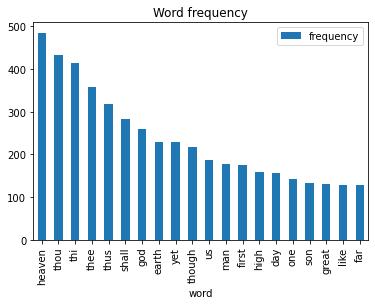

In [16]:
plt.figure(figsize=(12, 9))
df = pd.DataFrame(stem_word_count.most_common(20), columns=['word', 'frequency'])
df.plot(kind='bar', x='word')
plt.title("Word frequency")
plt.show()

## Lemmatization 
Preprocessing - Exclude punctutation, stop words and meaningless words

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#print(lemmatizer.lemmatize('worrier',pos='v'))

In [18]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

without_punct = [w for w in paradise_words if w not in string.punctuation]
#without_punct = [re.sub(r'[^\w\s]','',w) for w in paradise_words ] 

lower_alpha_tokens = [t.lower() for t in paradise_words if t.isalpha()]

# Retain alphabetic words: alpha_only
#alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in lower_alpha_tokens if t not in sw]

#Removing meaningless words
meaningless_removed = [m for m in no_stops if m in words_dict]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

t1 = perf_counter()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t,pos="v") for t in meaningless_removed]

t2 = perf_counter()

print("Time taken for Lemmatization:", t2-t1)

Time taken for Lemmatization: 3.511760699999968


In [19]:
#check for all the words before lemmatization
print(meaningless_removed)

['paradise', 'lost', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'till', 'one', 'greater', 'man', 'restore', 'us', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'rose', 'chaos', 'sion', 'hill', 'delight', 'thee', 'brook', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'soar', 'th', 'mount', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'prefer', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighty', 'outspread', 'dove', 'like', 'sat', 'st', 'brooding', 'vast', 'abyss', 'mad', 'st', 'pregnant', 'dark', 'illumine', 'low', 'raise', 'support', 'height', 'great', 'argument', 'may', 'assert', 'eternal', 'providence', 'justify', 'way

In [20]:
print(len(paradise_words))
print(len(without_punct))
print(len(lower_alpha_tokens))
print(len(no_stops))
print(len(meaningless_removed))
print(len(lemmatized))

96825
80701
80493
45568
37283
37283


In [21]:
# Create the bag-of-words: bow
bow = Counter(lemmatized)

#print all the stemmed words
print(lemmatized)


['paradise', 'lose', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbid', 'tree', 'whose', 'mortal', 'taste', 'bring', 'death', 'world', 'woe', 'loss', 'till', 'one', 'greater', 'man', 'restore', 'us', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'didst', 'inspire', 'shepherd', 'first', 'teach', 'choose', 'seed', 'begin', 'heavens', 'earth', 'rise', 'chaos', 'sion', 'hill', 'delight', 'thee', 'brook', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'soar', 'th', 'mount', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'prefer', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighty', 'outspread', 'dive', 'like', 'sit', 'st', 'brood', 'vast', 'aby', 'mad', 'st', 'pregnant', 'dark', 'illumine', 'low', 'raise', 'support', 'height', 'great', 'argument', 'may', 'assert', 'eternal', 'providence', 'justify', 'ways', 'god', 'men

In [22]:
# Print the 20 most common tokens
print(bow.most_common(20))

[('thou', 432), ('heaven', 419), ('thy', 414), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 260), ('yet', 228), ('earth', 217), ('though', 217), ('us', 187), ('man', 176), ('first', 175), ('stand', 158), ('high', 153), ('find', 151), ('know', 146), ('one', 142), ('far', 129), ('death', 126)]


In [23]:
lemma_word_count = nltk.FreqDist(nltk.Text(lemmatized))
print(lemma_word_count)
print(lemma_word_count.most_common(20))

<FreqDist with 5042 samples and 37283 outcomes>
[('thou', 432), ('heaven', 419), ('thy', 414), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 260), ('yet', 228), ('earth', 217), ('though', 217), ('us', 187), ('man', 176), ('first', 175), ('stand', 158), ('high', 153), ('find', 151), ('know', 146), ('one', 142), ('far', 129), ('death', 126)]


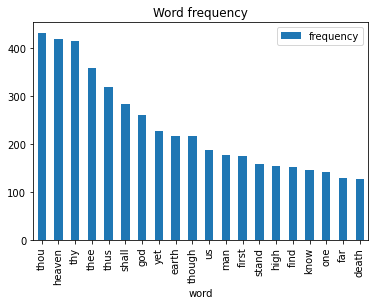

In [24]:
df = pd.DataFrame(lemma_word_count.most_common(20), columns=['word', 'frequency'])
#plt.figure(figsize =(12, 9))
df.plot(kind='bar',x='word')
plt.title("Word frequency")
plt.show()

### Why lemmatization or stemming
- Did both stemming and Lemmatization for comparision.
- Refererred to DataCamp article for this. https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
- Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.
 - Stemming has been used in Query systems such as Web Search Engines, but due to problems of under-stemming and over-stemming it's effectiveness in returning correct results have been found limited.
 - Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma - This is done by giving the value for pos parameter in wordnet_lemmatizer.lemmatize. see example below
 - So when to use what! The above points show that if speed is focused then stemming should be used since lemmatizers scan a corpus which consumed time and processing. It depends on the application you are working on that decides if stemmers should be used or lemmatizers. If you are building a language application in which language is important you should use lemmatization as it uses a corpus to match root forms.
 - In the example above for paradise-lost text, it was noticed that stemming is faster than lemmatization
 - Below examples are words from paradise-lost, where fobidden word was lemmatized(with pos='v') to forbid but stemming didn't change it. Darkness word was stemmed to dark but lemmatizer(both with and without pos parameter) didn't change it!

In [43]:
print(wordnet_lemmatizer.lemmatize('us'))
print(wordnet_lemmatizer.lemmatize('us',pos="v"))
print(stemmer.stem('us'))

print(wordnet_lemmatizer.lemmatize('forbidden'))
print(wordnet_lemmatizer.lemmatize('forbidden',pos="v"))
print(stemmer.stem('forbidden'))

print(wordnet_lemmatizer.lemmatize('darkness'))
print(wordnet_lemmatizer.lemmatize('darkness',pos="v"))
print(stemmer.stem('darkness'))


u
us
us
forbidden
forbid
forbidden
darkness
darkness
dark


## 2. Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. *

* If this is taking a long time to run on your computer, you can run only 10,000 sentences. But please try to do it with the whole text before you give up. One of my computers can handle it in a timely manner, the other not so much. 

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

### Doing sentiment analysis by sentence.

In [27]:
paradise_sents = nltk.corpus.gutenberg.sents('milton-paradise.txt')
paradise_sents

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]

In [28]:
len(paradise_sents)

1851

In [44]:
#concatenate the data back into sentences, with one readable sentence in each list. 
#This is the same function used for week20 group exercise
def concat_sentences(sentences):
    cstring=''
    sentence_list = []
    for sentence in sentences:
        cstring = ' '.join(sentence)
        slist = []
        slist.append(cstring)
        sentence_list.append(slist)
    return sentence_list


In [30]:
#concatenate the data back into sentences, with one readable sentence in each list.
paradise_slist = concat_sentences(paradise_sents)
len(paradise_slist)

1851

In [31]:
paradise_slist

[['[ Paradise Lost by John Milton 1667 ]'],
 ['Book I'],
 ["Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme ."],
 ["And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the v

In [32]:
pd.set_option('display.max_colwidth', 500)

In [33]:
#Go through each sentence in the list and check its polarity_scores(i.e neutral, negative, positive and compound intensity)
sentiments=[]
for i in range(0,len(paradise_slist)):
    sentiment = analyzer.polarity_scores(paradise_slist[i][0])
    #print(paradise_slist[i][0])
    ## Append the senetence, compound, positive, negative and neutral scores in the dictionary
    sentiments.append({
                "sentence":paradise_slist[i][0],
                "compound":sentiment["compound"],
                "positive":sentiment["pos"],
                "negative":sentiment["neg"],
                "neutral":sentiment["neu"]
    })
    
#Convert the sentiments dictionary to dataframe
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.head(50)

,sentence,compound,positive,negative,neutral
0,[ Paradise Lost by John Milton 1667 ],0.4404,0.400,0.219,0.381
1,Book I,0.0000,0.000,0.000,1.000
2,"Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by ...",0.8885,0.192,0.117,0.691
3,"And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the vast Abyss , And mad ' st it pregnant : what in me is dark Illumine , what is low raise and support ; That , to the height of this great argument , I may assert Eternal Providence , And justify the ways of God to men .",0.7331,0.163,0.085,0.752
4,"Say first -- for Heaven hides nothing from thy view , Nor the deep tract of Hell -- say first what cause Moved our grand parents , in that happy state , Favoured of Heaven so highly , to fall off From their Creator , and transgress his will For one restraint , lords of the World besides .",0.8689,0.239,0.093,0.668
5,Who first seduced them to that foul revolt ?,-0.3612,0.000,0.263,0.737
6,"Th ' infernal Serpent ; he it was whose guile , Stirred up with envy and revenge , deceived The mother of mankind , what time his pride Had cast him out from Heaven , with all his host Of rebel Angels , by whose aid , aspiring To set himself in glory above his peers , He trusted to have equalled the Most High , If he opposed , and with ambitious aim Against the throne and monarchy of God , Raised impious war in Heaven and battle proud , With vain attempt .",0.6808,0.219,0.177,0.604
7,"Him the Almighty Power Hurled headlong flaming from th ' ethereal sky , With hideous ruin and combustion , down To bottomless perdition , there to dwell In adamantine chains and penal fire , Who durst defy th ' Omnipotent to arms .",-0.6908,0.037,0.152,0.811
8,"Nine times the space that measures day and night To mortal men , he , with his horrid crew , Lay vanquished , rolling in the fiery gulf , Confounded , though immortal .",-0.5994,0.063,0.185,0.752
9,"But his doom Reserved him to more wrath ; for now the thought Both of lost happiness and lasting pain Torments him : round he throws his baleful eyes , That witnessed huge affliction and dismay , Mixed with obdurate pride and steadfast hate .",-0.6705,0.184,0.264,0.553


In [34]:
# 5 most negative sentences
sentiments_df.sort_values(by='negative',ascending=False).head()[['sentence','negative']]

,sentence,negative
512,O Hell !,1.000
1689,Alas !,1.000
153,No !,1.000
478,Me miserable !,0.777
175,Sad cure !,0.772


In [35]:
# 5 most positive sentences
sentiments_df.sort_values(by='positive',ascending=False).head(5)[['sentence','positive']]

,sentence,positive
908,O Friends !,1.000
605,O friends !,1.000
1441,O Heaven !,1.000
828,O Heaven !,1.000
1233,"She fair , divinely fair , fit love for Gods !",0.838


In [36]:
# 5 most neutral sentences
sentiments_df.sort_values(by='neutral',ascending=False).head()[['sentence','neutral']]

,sentence,neutral
1850,[ The End ],1.0
1118,nor enviest .,1.0
1020,infinite Thy power !,1.0
1021,"what thought can measure thee , or tongue Relate thee !",1.0
242,"This said , he sat ; and expectation held His look suspense , awaiting who appeared To second , or oppose , or undertake The perilous attempt .",1.0


In [45]:
sentiments_df.describe()

,compound,positive,negative,neutral
count,10636.000000,10636.000000,10636.00000,10636.000000
mean,0.051369,0.129559,0.09199,0.772436
std,0.374072,0.185566,0.16401,0.230331
min,-0.946000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.612000
50%,0.000000,0.000000,0.00000,0.755000
75%,0.318200,0.286000,0.19100,1.000000
max,0.938100,0.858000,1.00000,1.000000


## 3. Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 
- Sentiment analysis is to analyze the emotion of the text. Sentiment analysis gave positive, negative, neutral and compound scores for each sentence of paradise-lost. 
- The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text.
- Looking at the dataframe above, Paradise-lost looks like is more neutral toned text.
- It looks like there are no all uppercase words
- Looking at the top 5 most negative sentiment scores.
    - The first 3 sentence has only one word which sounds negative and has exclaimation mark, so score is 1 i.e 100% negative
    - The other 2 sentences has 2 words out of which one is definitely sounds negative and has exclaimation mark and has score 0.77 i.e 77% negative

- Looking at the top 5 most positive sentiment scores.
    - First 4 senetences are just one letter and a word which sounds positive,has exclaimation mark,  positive score is 100%
    - 5 the senetence has positive words like love, fair, has exclaimation mark, postive score is 83%

- Looking at the top 5 most neutral sentiment scores.
    - 3rd senetence, word like power can sound poisitive, vader analysis gave neutral score of 100%
    - 5th line suspense, oppose can this be negative sounding words? 
    - 1st and 2nd line sounds neutral with no positive or negative sounding words
    
- I think, VADER classifies the sentiments very well.
- Referred to this article https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/

### Doing sentiment analysis on each line

In [37]:
paradise_lost_lines = nltk.corpus.gutenberg.raw('milton-paradise.txt').split("\n")
len(paradise_lost_lines)

10636

In [38]:
#Go through each sentence in the list and check its polarity_scores(i.e neutral, negative, positive and compound intensity)
sentiments=[]
for line in paradise_lost_lines:
    sentiment = analyzer.polarity_scores(line)
    
    ## Append the senetence, compound, positive, negative and neutral scores in the dictionary
    sentiments.append({
                "sentence":line,
                "compound":sentiment["compound"],
                "positive":sentiment["pos"],
                "negative":sentiment["neg"],
                "neutral":sentiment["neu"]
    })
    
#Convert the sentiments dictionary to dataframe
sentiments_df = pd.DataFrame(sentiments)
sentiments_df

,sentence,compound,positive,negative,neutral
0,[Paradise Lost by John Milton 1667],-0.3182,0.000,0.315,0.685
1,,0.0000,0.000,0.000,0.000
2,,0.0000,0.000,0.000,0.000
3,Book I,0.0000,0.000,0.000,1.000
4,,0.0000,0.000,0.000,0.000
...,...,...,...,...,...
10631,"They, hand in hand, with wandering steps and slow,",0.7506,0.478,0.000,0.522
10632,Through Eden took their solitary way.,0.0000,0.000,0.000,1.000
10633,,0.0000,0.000,0.000,0.000
10634,[The End],0.0000,0.000,0.000,1.000


In [39]:
# 5 most negative sentences
sentiments_df.sort_values(by='negative',ascending=False).head()[['sentence','negative']]

,sentence,negative
5406,"Exhausted, spiritless, afflicted, fallen.",1.000
916,"Desperate revenge, and battle dangerous",0.919
510,"Exposed a matron, to avoid worse rape.",0.850
1305,O shame to men! Devil with devil damned,0.831
10381,"On penalty of death, and suffering death;",0.822


In [40]:
# 5 most positive sentences
sentiments_df.sort_values(by='positive',ascending=False).head(5)[['sentence','positive']]

,sentence,positive
1571,"I pleased, and with attractive graces won",0.858
608,"Of dauntless courage, and considerate pride",0.855
7267,"She fair, divinely fair, fit love for Gods!",0.838
2211,"With joy and peace triumphing, and fair truth.",0.835
6299,"Intelligence of Heaven, Angel serene!",0.829


In [41]:
# 5 most neutral sentences
sentiments_df.sort_values(by='neutral',ascending=False).head()[['sentence','neutral']]

,sentence,neutral
5318,And quiver with three-bolted thunder stored;,1.0
4009,To rest; and what the garden choicest bears,1.0
4020,"With flowerets decked, and fragrant smells; but Eve,",1.0
8119,"Before his voice? or was she made thy guide,",1.0
4018,I have at will. So to the sylvan lodge,1.0
